In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")
df

,Unnamed: 0,Gender,Shift,Injury Location,Age_grouping,scaled_DaysLost,scaled_IncidentCost,Incident Type_Burn,Incident Type_Crush & Pinch,Incident Type_Cut,Incident Type_Equipment,Incident Type_Fall,Incident Type_Falling object,Incident Type_Lifting,Incident Type_Slip/trip,Incident Type_Vehicle
0,0,0,1,0,2,0.0,1.0000,1,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0.0,0.9988,0,0,1,0,0,0,0,0,0
2,2,0,0,0,3,1.0,0.9938,0,0,0,0,0,0,1,0,0
3,3,1,0,1,5,0.5,0.9894,0,0,0,0,0,0,1,0,0
4,4,0,0,0,2,0.6,0.9880,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,509,1,1,0,3,0.0,0.0000,0,0,0,0,0,0,1,0,0
468,510,0,1,0,3,0.0,0.0000,0,0,0,0,0,0,0,1,0
469,511,0,1,0,2,0.0,0.0000,0,1,0,0,0,0,0,0,0
470,512,0,1,5,3,0.0,0.0000,0,0,0,0,0,0,1,0,0


In [2]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Shift', 'Injury Location', 'Age_grouping',
       'scaled_DaysLost', 'scaled_IncidentCost', 'Incident Type_Burn',
       'Incident Type_Crush & Pinch', 'Incident Type_Cut',
       'Incident Type_Equipment', 'Incident Type_Fall',
       'Incident Type_Falling object', 'Incident Type_Lifting',
       'Incident Type_Slip/trip', 'Incident Type_Vehicle'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split

X=df[['Gender', 'Shift','scaled_DaysLost', 'Incident Type_Burn',
       'Incident Type_Crush & Pinch', 'Incident Type_Cut',
       'Incident Type_Equipment', 'Incident Type_Fall',
       'Incident Type_Falling object', 'Incident Type_Lifting',
       'Incident Type_Slip/trip', 'Incident Type_Vehicle']].astype(float)
Y = df[['Injury Location']].astype(float)
Y=np.ravel(Y)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state =2)
X

,Gender,Shift,scaled_DaysLost,Incident Type_Burn,Incident Type_Crush & Pinch,Incident Type_Cut,Incident Type_Equipment,Incident Type_Fall,Incident Type_Falling object,Incident Type_Lifting,Incident Type_Slip/trip,Incident Type_Vehicle
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
467,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
468,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
from sklearn.neighbors import KNeighborsClassifier
# train 점수
trainList = []
for k in range(1,301):
    # 모델 선택 및 하이퍼 파라미터 튜닝
    model = KNeighborsClassifier(n_neighbors = k)
    # 모델학습
    model.fit(X_train, y_train)
    # 모델 평가
    trainList.append(model.score(X_train, y_train))
    print(f"이웃{k}개 : {trainList[k-1]}")

이웃1개 : 0.40583554376657827
이웃2개 : 0.33421750663129973
이웃3개 : 0.35013262599469497
이웃4개 : 0.3395225464190981
이웃5개 : 0.33156498673740054
이웃6개 : 0.3183023872679045
이웃7개 : 0.3050397877984085
이웃8개 : 0.3050397877984085
이웃9개 : 0.30238726790450926
이웃10개 : 0.30238726790450926
이웃11개 : 0.2864721485411141
이웃12개 : 0.3050397877984085
이웃13개 : 0.29442970822281167
이웃14개 : 0.3050397877984085
이웃15개 : 0.29973474801061006
이웃16개 : 0.29442970822281167
이웃17개 : 0.2838196286472148
이웃18개 : 0.29973474801061006
이웃19개 : 0.29708222811671087
이웃20개 : 0.2891246684350133
이웃21개 : 0.2838196286472148
이웃22개 : 0.2864721485411141
이웃23개 : 0.2917771883289125
이웃24개 : 0.2891246684350133
이웃25개 : 0.29442970822281167
이웃26개 : 0.29442970822281167
이웃27개 : 0.3050397877984085
이웃28개 : 0.29442970822281167
이웃29개 : 0.2891246684350133
이웃30개 : 0.2917771883289125
이웃31개 : 0.2917771883289125
이웃32개 : 0.2864721485411141
이웃33개 : 0.27851458885941643
이웃34개 : 0.27055702917771884
이웃35개 : 0.2891246684350133
이웃36개 : 0.2864721485411141
이웃37개 : 0.28647214854

In [5]:
# test점수
testList = []
best = 0
a=0
for k in range(1,301):
    # 모델 선택 및 하이퍼 파라미터 튜닝
    model = KNeighborsClassifier(n_neighbors = k)
    # 모델학습 : 학습은 무조건 train(훈련)으로 해야한다.
    model.fit(X_train, y_train)
    # 모델 평가
    testList.append(model.score(X_test, y_test))
    print(f"이웃{k}개 : {testList[k-1]}",)
    if best < model.score(X_test,y_test) :
        best = model.score(X_test,y_test)
        a=k
a

이웃1개 : 0.23157894736842105
이웃2개 : 0.21052631578947367
이웃3개 : 0.17894736842105263
이웃4개 : 0.18947368421052632
이웃5개 : 0.22105263157894736
이웃6개 : 0.23157894736842105
이웃7개 : 0.23157894736842105
이웃8개 : 0.23157894736842105
이웃9개 : 0.2
이웃10개 : 0.23157894736842105
이웃11개 : 0.2631578947368421
이웃12개 : 0.24210526315789474
이웃13개 : 0.2736842105263158
이웃14개 : 0.2631578947368421
이웃15개 : 0.23157894736842105
이웃16개 : 0.2631578947368421
이웃17개 : 0.2631578947368421
이웃18개 : 0.23157894736842105
이웃19개 : 0.25263157894736843
이웃20개 : 0.30526315789473685
이웃21개 : 0.25263157894736843
이웃22개 : 0.2736842105263158
이웃23개 : 0.29473684210526313
이웃24개 : 0.3157894736842105
이웃25개 : 0.30526315789473685
이웃26개 : 0.2631578947368421
이웃27개 : 0.2631578947368421
이웃28개 : 0.29473684210526313
이웃29개 : 0.3157894736842105
이웃30개 : 0.29473684210526313
이웃31개 : 0.30526315789473685
이웃32개 : 0.25263157894736843
이웃33개 : 0.28421052631578947
이웃34개 : 0.29473684210526313
이웃35개 : 0.25263157894736843
이웃36개 : 0.28421052631578947
이웃37개 : 0.2736842105263158


185

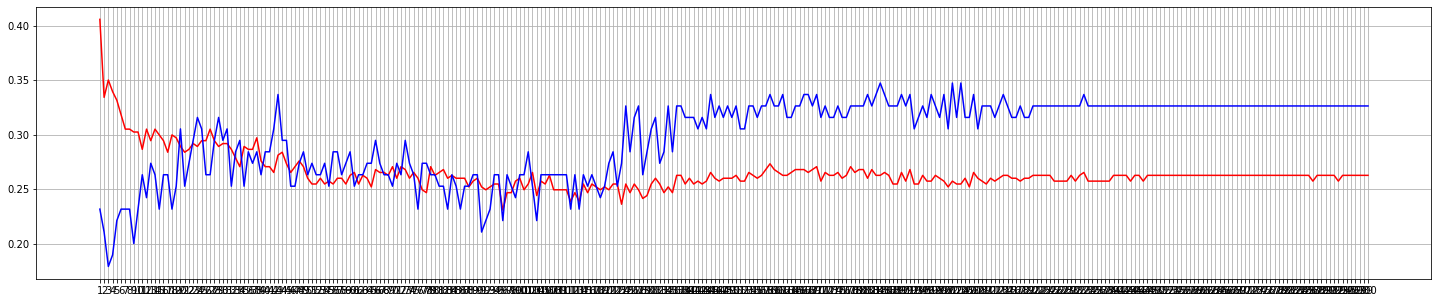

In [6]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(25,5)) # 출력할 그래프 크기
plt.plot(range(1, 301),
        trainList,  # y데이터
         c="red")
plt.plot(range(1, 301),
        testList,  # y데이터
         c="blue")

plt.xticks(range(1,301))
plt.grid() #기준선
plt.show()

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

kn = KNeighborsClassifier(n_neighbors = a)

kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))

Accuracy:  0.3473684210526316
